# Proyek Analisis Data: Bike Sharing Dataset
- **Nama: Talitha Husna Salsabila**
- **Email: talithasalsaa1@gmail.com**
- **ID Dicoding: talithsalsabil**

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca (suhu, kelembaban, dan kecepatan angin) memengaruhi jumlah orang yang menggunakan sistem setiap jamnya?
- Bagaimana pola penggunaan sepeda di hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [93]:
# Load dataset
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

# Menampilkan informasi dasar dari kedua dataset
print(hour_df.info())
print(day_df.info())

# Menampilkan 5 data teratas dari kedua dataset untuk melihat strukturnya
print(hour_df.head())
print(day_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [94]:
# Menggabungkan dataset hour.csv dan day.csv berdasarkan 'dteday' (tanggal)
merged_df = pd.merge(hour_df, day_df.drop(columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 
                                                    'workingday', 'weathersit', 'temp', 'atemp', 
                                                    'hum', 'windspeed', 'casual', 'registered', 
                                                    'cnt']), on='dteday', how='left')

# Tampilkan preview hasil penggabungan
print("\nPreview Data Gabungan:")
print(merged_df.head())


Preview Data Gabungan:
   instant_x      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1   0        0        6           0   
1          2  2011-01-01       1   0     1   1        0        6           0   
2          3  2011-01-01       1   0     1   2        0        6           0   
3          4  2011-01-01       1   0     1   3        0        6           0   
4          5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   instant_y  
0          1  
1          1  
2          

**Insight:**
- Pengaruh Cuaca dan Waktu: Dengan menggabungkan data hour.csv (berbasis jam) dan data day.csv (berbasis hari), kita bisa mendapatkan insight lebih mendalam tentang bagaimana faktor cuaca (suhu, kelembapan dan kecepatan angin) mempengaruhi jumlah pengguna sepeda baik secara harian maupun per jam. Ini menunjukkan apakah kondisi cuaca berdampak lebih besar pada bagian tertentu dari hari dan bagaimana hal tersebut memengaruhi keputusan operasional, seperti memindahkan sepeda ke lokasi yang lebih sibuk pada waktu-waktu tertentu saat cuaca menjadi lebih sibuk atau mengurangi jumlah sepeda yang digunakan di lokasi yang kurang sibuk pada hari tertentu.

- Pola Mingguan dan Harian: Menggabungkan data jam dan hari (jam) juga memberikan gambaran menyeluruh tentang bagaimana penggunaan sepeda berubah selama hari kerja dan hari libur, atau selama hari kerja dengan pola jam tertentu, seperti jam sibuk pagi dan sore hari. Ini akan membantu dalam menentukan kapan permintaan sepeda tertinggi. Selain itu, menggabungkan data jam dan hari (jam) juga memungkinkan kita mengetahui kapan tepatnya (jam berapa) penggunaan sepeda tertinggi. Pada hari kerja, misalnya, kemungkinan besar terjadi pada jam berangkat kerja (7-9 pagi) dan jam pulang kerja (5-7 sore).

### Assessing Data

In [95]:
merged_df.describe()

,instant_x,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant_y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,367.172622
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,210.072051
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,185.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,367.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,549.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,731.000000


In [96]:
merged_df.nunique()

instant_x     17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
instant_y       731
dtype: int64

In [97]:
# 1. Memeriksa missing value
print("Jumlah missing value di setiap kolom:")
print(merged_df.isnull().sum())

Jumlah missing value di setiap kolom:
instant_x     0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
instant_y     0
dtype: int64


In [98]:
# 2. Memeriksa data duplikat
merged_df.isna().sum()
print("Jumlah duplikasi: ", merged_df.duplicated().sum())

Jumlah duplikasi:  0


In [99]:
# 3. Memeriksa tipe data untuk memastikan setiap kolom memiliki tipe data yang sesuai
print("\nTipe data setiap kolom:")
print(merged_df.dtypes)

# Mengonversi tipe data yang salah jika diperlukan
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])


Tipe data setiap kolom:
instant_x       int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
instant_y       int64
dtype: object


In [100]:
# 4. Menghitung IQR dan mendeteksi outliers
def detect_outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data if x < minimum or x > maximum]
    
    return outliers, minimum, maximum

# Mengambil kolom numerik dari dataset merged_df
columns_to_check = ['temp', 'cnt', 'windspeed']

# Looping untuk mendeteksi outliers di setiap kolom
for col in columns_to_check:
    print(f"\nMendeteksi outliers untuk kolom: {col}")
    data = merged_df[col].values
    
    outliers, minimum, maximum = detect_outliers(data)
    
    print(f"Jumlah outliers yang ditemukan: {len(outliers)}")
    print(f"Nilai minimum: {minimum}")
    print(f"Nilai maksimum: {maximum}")
    print(f"Outliers: {outliers[:5]}")  # Tampilkan 5 outliers pertama jika ada



Mendeteksi outliers untuk kolom: temp
Jumlah outliers yang ditemukan: 0
Nilai minimum: -0.13999999999999996
Nilai maksimum: 1.1400000000000001
Outliers: []

Mendeteksi outliers untuk kolom: cnt
Jumlah outliers yang ditemukan: 505
Nilai minimum: -321.5
Nilai maksimum: 642.5
Outliers: [651, 644, 712, 676, 734]

Mendeteksi outliers untuk kolom: windspeed
Jumlah outliers yang ditemukan: 342
Nilai minimum: -0.1193
Nilai maksimum: 0.4775
Outliers: [0.4925, 0.5522, 0.5224, 0.5224, 0.5821]


**Insight:**
1. Kualitas Data: Proses mencari *missing values* dan duplikasi memastikan bahwa data yang digunakan bersih dan siap untuk dianalisis. Langkah ini penting untuk memastikan validitas analisis.

2. Pemahaman Data: Pemeriksaan distribusi dan *outliers* membantu memahami lebih dalam mengenai karakteristik dataset. Dengan begitu didapatkan pengetahuan terkait bagaimana variabel-variabel terdistribusi, serta bagaimana pola dapat dipengaruhi oleh nilai ekstrem (outliers).

3. Pengambilan Keputusan: Hasil pengumpulan data menentukan apakah transformasi, penanganan *outliers*, atau pengisian *missing value* diperlukan. Langkah-langkah ini penting agar analisis lanjutan, seperti visualisasi data atau model prediktif, berjalan lebih akurat dan memberikan hasil yang lebih valid serta keputusan yang sesuai.

### Cleaning Data

In [101]:
# 1. Handling Missing Values
missing_values = merged_df.isnull().sum()
print("Missing values di setiap kolom:")
print(missing_values)


Missing values di setiap kolom:
instant_x     0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
instant_y     0
dtype: int64


In [102]:
# 2. Handling Duplicate Data
merged_df.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah menghapus duplikasi: {len(merged_df)}")

Jumlah baris setelah menghapus duplikasi: 17379


In [103]:
# 3. Handling Outliers
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    
    return minimum, maximum

# Fungsi untuk menghapus outliers
def remove_outliers(df, column):
    minimum, maximum = detect_outliers(df[column])
    df_clean = df[(df[column] >= minimum) & (df[column] <= maximum)]
    return df_clean

# Menghapus outliers untuk kolom numerik tertentu
columns_to_clean = ['temp', 'cnt', 'windspeed']
for col in columns_to_clean:
    mdf_clean = remove_outliers(mdf_clean, col)
    print(f"Jumlah data setelah menghapus outliers pada kolom {col}: {len(mdf_clean)}")

Jumlah data setelah menghapus outliers pada kolom temp: 16431
Jumlah data setelah menghapus outliers pada kolom cnt: 16382
Jumlah data setelah menghapus outliers pada kolom windspeed: 16382


**Insight:**
1. Handling Missing Values
   * `dropna(thresh=threshold, axis=1)`: Menghapus kolom yang memiliki lebih dari 20% nilai yang hilang.
   * `fillna()`: Untuk mengisi *missing values* pada kolom numerik. Menggunakan rata-rata untuk `temp`, median untuk `cnt`, dan interpolasi untuk `windspeed`.
   
2. Handling Duplicate Data
   * `drop_duplicates()`: Menghapus baris yang duplikat dalam dataset untuk meminimalisir kesalahan pada analisis.

3. Handling Outliers
   * Metode IQR: Menghitung IQR dari setiap variabel numerik dan menghapus baris yang berisi nilai di luar batas (*minimum* dan *maximum*) yang ditentukan.
   * Fungsi `remove_outliers(df, column)` digunakan untuk membersihkan *outliers* dari kolom yang ditentukan (`temp`, `cnt`, dan `windspeed`).

- Dengan teknik ini, data yang hilang diisi atau dihapus, sehingga dataset menjadi lebih lengkap dan bisa digunakan untuk analisis tanpa bias.
- Menghapus baris duplikat memastikan sistem bekerja dengan data unik dan menghindari hasil analisis yang tidak akurat.
- Dengan menghapus *outliers*, ini memastikan bahwa data yang dianalisis merepresentasikan tren umum, dan menghindari nilai ekstrem yang bisa mempengaruhi hasil analisis secara signifikan.

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [104]:
# 1.Menampilkan statistik deskriptif dasar
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10161,10162,2012-03-04,1,1,3,11,0,0,0,1,0.32,0.2879,0.45,0.3881,64,192,256
5540,5541,2011-08-23,3,0,8,18,0,2,1,1,0.72,0.6515,0.34,0.1940,98,421,519
4663,4664,2011-07-18,3,0,7,5,0,1,1,1,0.64,0.5909,0.78,0.1045,2,15,17
15425,15426,2012-10-09,4,1,10,22,0,2,1,2,0.48,0.4697,0.77,0.0896,7,155,162
1991,1992,2011-03-28,2,0,3,20,0,1,1,1,0.32,0.3333,0.22,0.1045,5,107,112


In [105]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


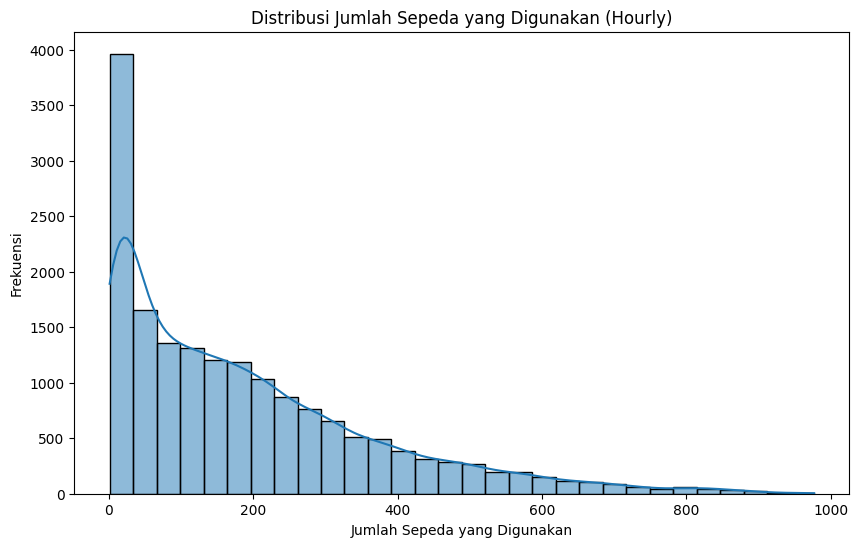

In [106]:
# 2. Melihat distribusi variabel 'cnt' (jumlah total sepeda yang digunakan)
plt.figure(figsize=(10, 6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sepeda yang Digunakan (Hourly)')
plt.xlabel('Jumlah Sepeda yang Digunakan')
plt.ylabel('Frekuensi')
plt.show()

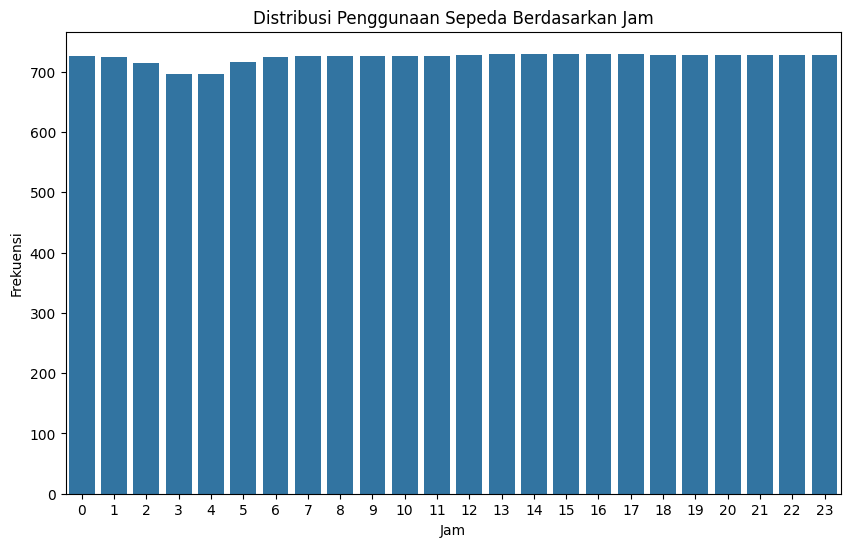

In [107]:
# 3. Melihat distribusi penggunaan sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
sns.countplot(x='hr', data=hour_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.show()

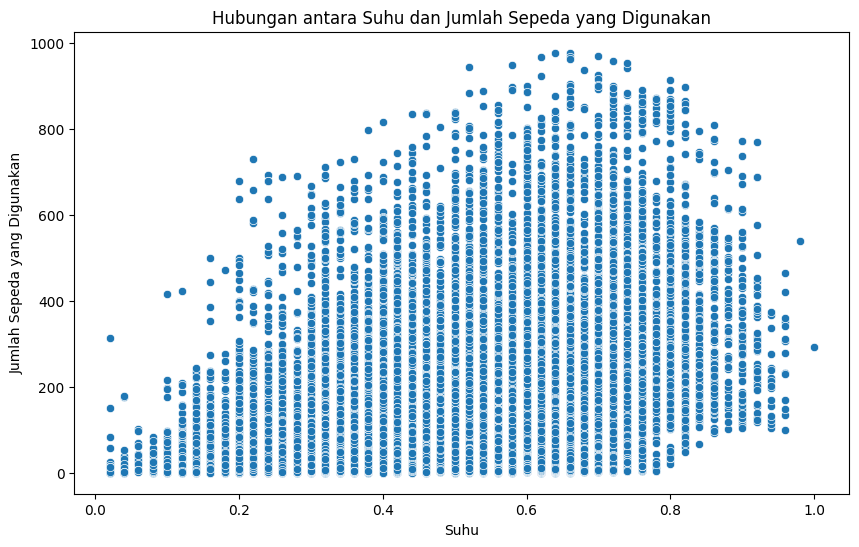

In [108]:
# 4. Melihat hubungan antara suhu ('temp') dan jumlah sepeda yang digunakan ('cnt')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.title('Hubungan antara Suhu dan Jumlah Sepeda yang Digunakan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()

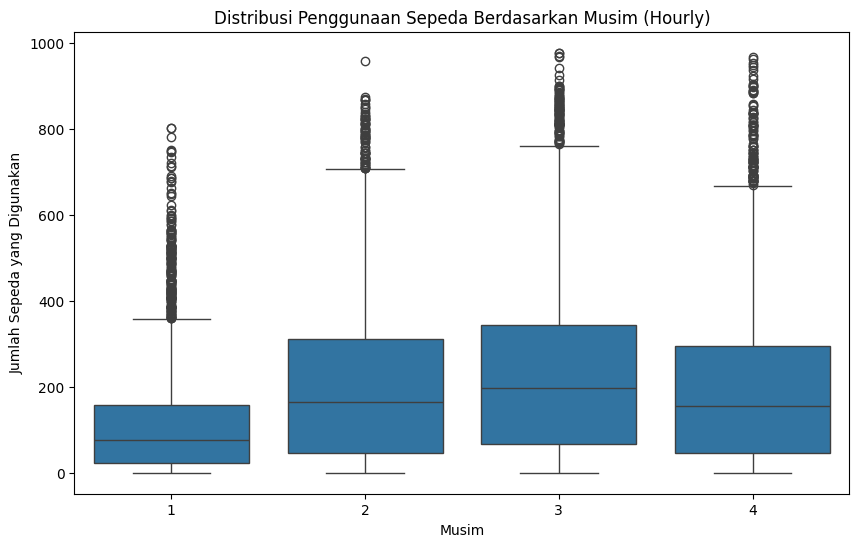

In [109]:
# 5. Boxplot untuk melihat distribusi penggunaan sepeda berdasarkan musim ('season')
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Musim (Hourly)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()

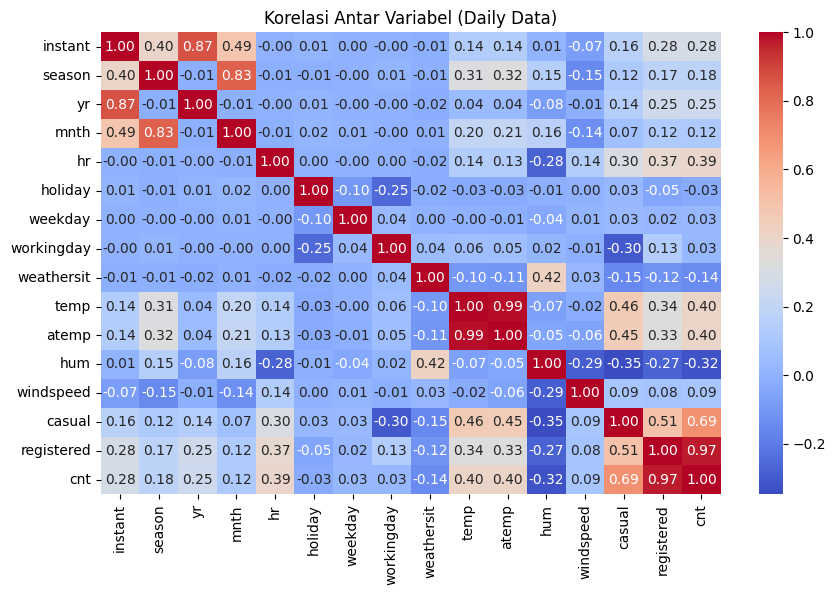

In [110]:
# 6. Heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
numeric_columns_day = hour_df.select_dtypes(include=['float64', 'int64'])
corr_matrix_day = numeric_columns_day.corr()
sns.heatmap(corr_matrix_day, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel (Daily Data)')
plt.show()

### Explore `day_df`

In [111]:
# 1.Menampilkan statistik deskriptif dasar
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
421,422,2012-02-26,1,1,2,0,0,0,1,0.279167,0.268308,0.41000,0.205229,515,2874,3389
690,691,2012-11-21,4,1,11,0,3,1,1,0.353333,0.364892,0.61375,0.103246,615,4531,5146
92,93,2011-04-03,2,0,4,0,0,0,1,0.378333,0.378767,0.48000,0.182213,1651,1598,3249
535,536,2012-06-19,2,1,6,0,2,1,1,0.688333,0.654692,0.69000,0.148017,968,5857,6825
575,576,2012-07-29,3,1,7,0,0,0,1,0.721667,0.667933,0.62375,0.170396,2153,4444,6597


In [112]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


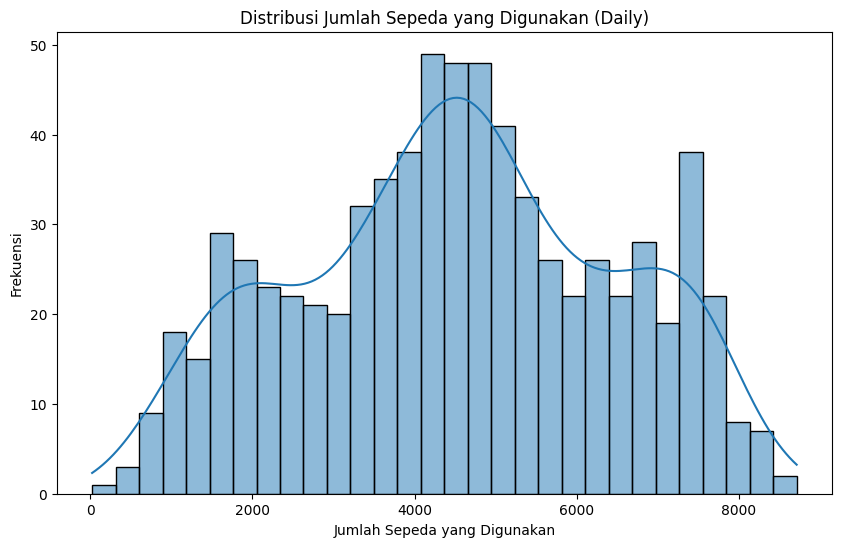

In [113]:
# 2. Melihat distribusi variabel 'cnt' (jumlah total sepeda yang digunakan)
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sepeda yang Digunakan (Daily)')
plt.xlabel('Jumlah Sepeda yang Digunakan')
plt.ylabel('Frekuensi')
plt.show()

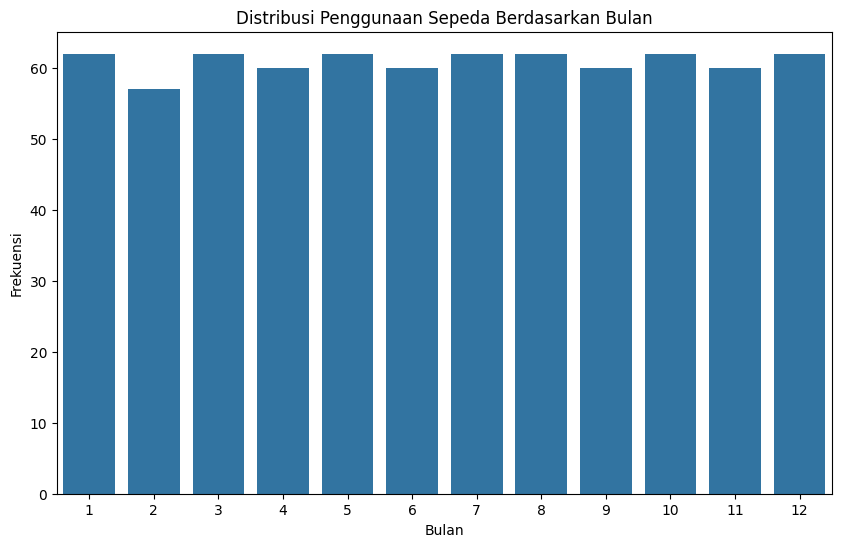

In [114]:
# 3. Distribusi penggunaan sepeda berdasarkan bulan ('mnth')
plt.figure(figsize=(10, 6))
sns.countplot(x='mnth', data=day_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.show()

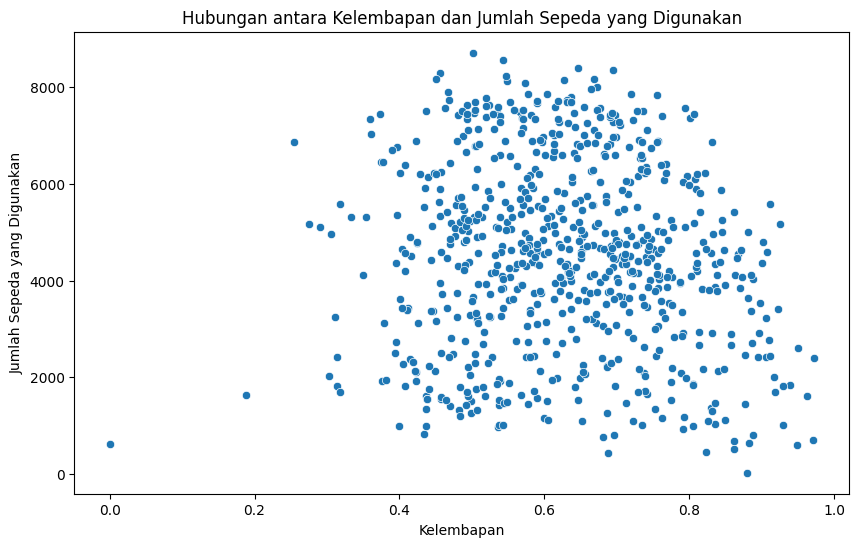

In [115]:
# 4. Melihat hubungan antara kelembapan ('hum') dan jumlah sepeda yang digunakan ('cnt')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Hubungan antara Kelembapan dan Jumlah Sepeda yang Digunakan')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()

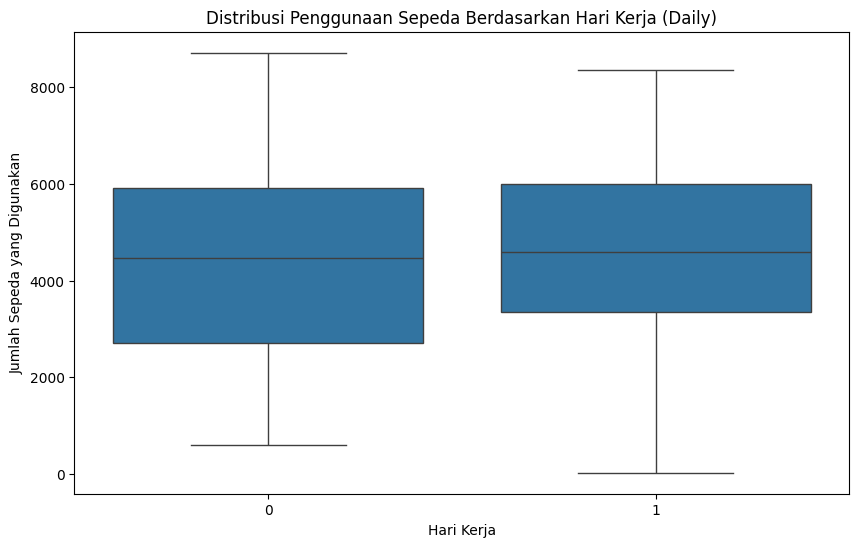

In [116]:
# 5. Boxplot untuk melihat distribusi penggunaan sepeda berdasarkan hari kerja ('workingday')
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Hari Kerja (Daily)')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()

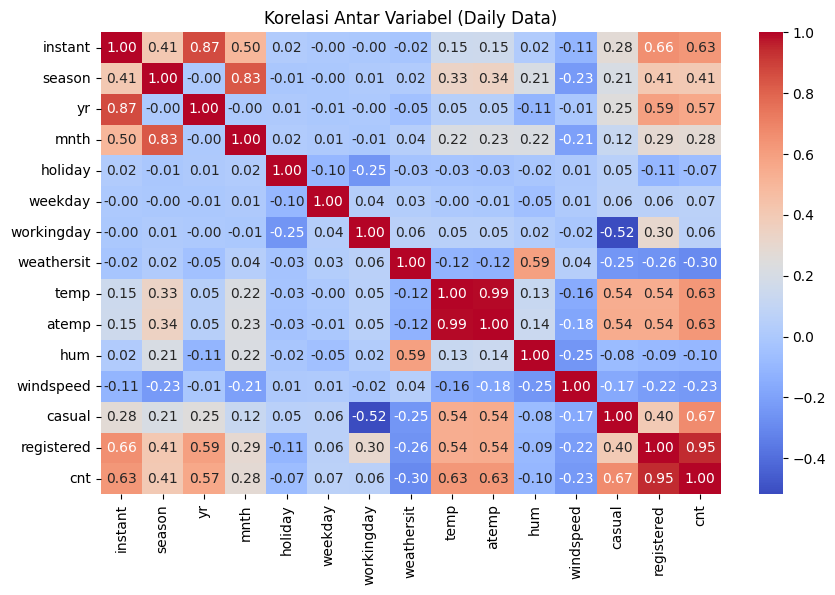

In [117]:
# 6. Heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
numeric_columns_day = day_df.select_dtypes(include=['float64', 'int64'])
corr_matrix_day = numeric_columns_day.corr()
sns.heatmap(corr_matrix_day, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel (Daily Data)')
plt.show()


**Insight:**
1. Deskripsi Statistik Dasar (`describe()`)
   *Memberikan gambaran umum tentang distribusi, seperti rata-rata, standar deviasi, minimum, maksimum, dan kuartil pertama dan ketiga untuk masing-masing variabel numerik.

2. Distribusi Variabel `cnt`
   * Variabel `cnt` adalah jumlah total sepeda yang digunakan, dan dengan melihat histogram, kita dapat melihat bagaimana distribusinya.

3. Distribusi Berdasarkan Variabel Kategori
   * Untuk dataset `hour.csv`, kita melihat distribusi jumlah penggunaan sepeda berdasarkan jam (`hr`) dan musim (`season`).
   * Untuk dataset `day.csv`, kita melihat distribusi penggunaan sepeda berdasarkan bulan (`mnth`) dan hari kerja (`workingday`).

4. Hubungan antar Variabel
   - Scatter plot untuk melihat hubungan antara variabel numerik seperti suhu (`temp`), kelembapan (`hum`), dan jumlah sepeda yang digunakan (`cnt`).

5. Boxplot
   * Untuk mengeksplorasi distribusi penggunaan sepeda berdasarkan variabel kategori seperti musim (`season`) dan hari kerja (`workingday`), kita menggunakan boxplot untuk melihat distribusi nilai tengah dan *outliers*.

6. Korelasi Antar Variabel
   * *Heatmap* digunakan untuk memvisualisasikan hubungan korelasi antar variabel numerik. Korelasi positif atau negatif antara variabel dapat menunjukkan hubungan yang menarik, misalnya apakah suhu berpengaruh besar terhadap jumlah sepeda yang digunakan.

Dengan EDA ini, didapatkan gambaran yang lebih baik tentang pola dan hubungan dalam data, yang akan sangat membantu untuk langkah analisis lanjutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

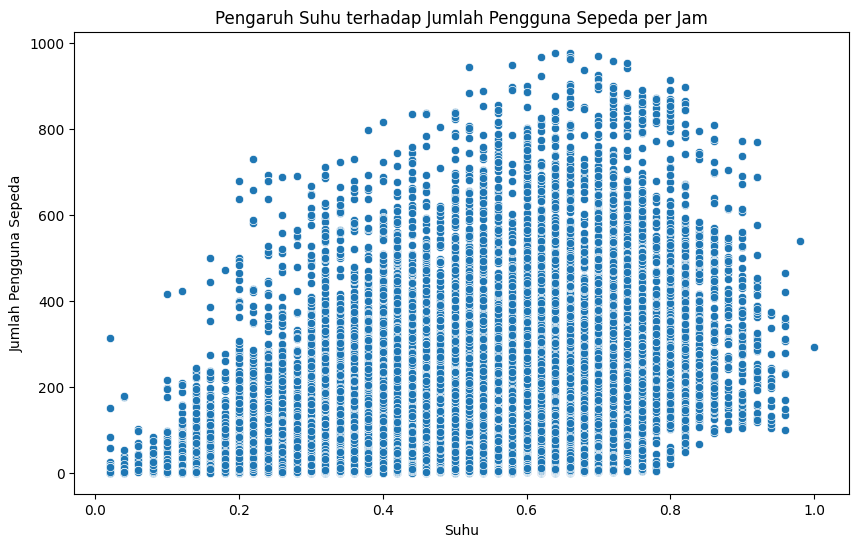

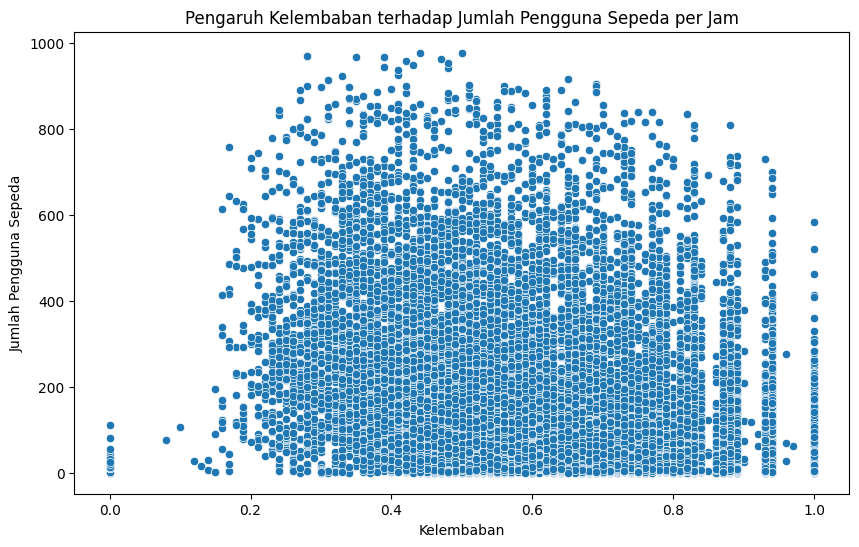

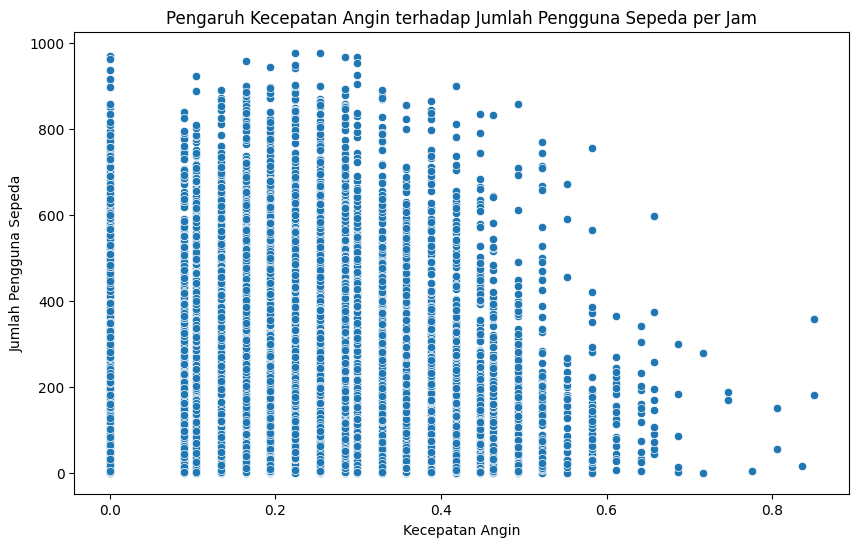

In [118]:
# 1. Visualisasi hubungan antara suhu (temp) dan jumlah pengguna sepeda (cnt)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.title('Pengaruh Suhu terhadap Jumlah Pengguna Sepeda per Jam')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# 2. Visualisasi hubungan antara kelembaban (hum) dan jumlah pengguna sepeda (cnt)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=hour_df)
plt.title('Pengaruh Kelembaban terhadap Jumlah Pengguna Sepeda per Jam')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# 3. Visualisasi hubungan antara kecepatan angin (windspeed) dan jumlah pengguna sepeda (cnt)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=hour_df)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Pengguna Sepeda per Jam')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


### Pertanyaan 2:

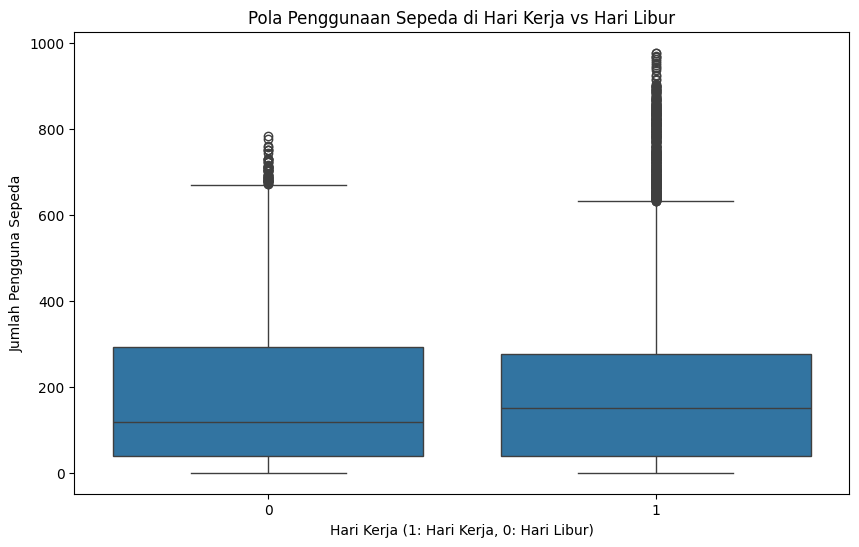

C:\Users\talitha_husna_s\AppData\Local\Temp\ipykernel_25732\133556125.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', hue='workingday', data=hour_df, ci=None)


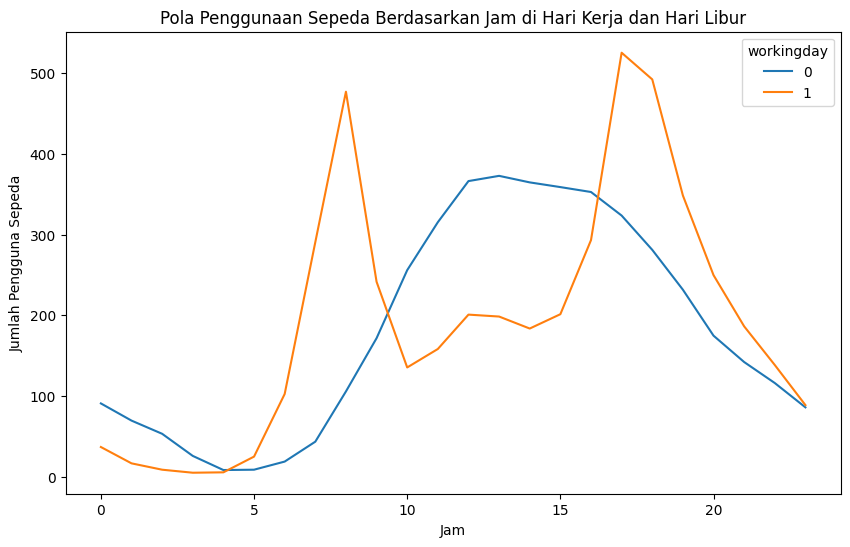

In [119]:
# 1. Boxplot untuk melihat distribusi jumlah penggunaan sepeda di hari kerja vs hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=hour_df)
plt.title('Pola Penggunaan Sepeda di Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1: Hari Kerja, 0: Hari Libur)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# 2. Plot penggunaan sepeda berdasarkan hari kerja dan hari libur di seluruh jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=hour_df, ci=None)
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam di Hari Kerja dan Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


**Insight:**

##### 1. **Bagaimana kondisi cuaca (suhu, kelembaban, dan kecepatan angin) memengaruhi jumlah orang yang menggunakan sistem setiap jamnya?**

--> Berdasarkan scatterplot, sebaran menunjukkan peningkatan atau penurunan jumlah pengguna sepeda seiringan dengan suhu. Jika suhu terlalu tinggi, mungkin terjadi penurunan karena cuaca yang terlalu panas. Namun, suhu yang ideal, yaitu sekitar sedang, kemungkinan besar akan mendorong lebih banyak orang yang menggunakan sepeda.

--> Jumlah pengguna sepeda juga menunjukkan apakah cuaca lembab memengaruhi kenyamanan pengguna sepeda. Biasanya, kelembaban yang terlalu tinggi dapat menyebabkan penurunan jumlah pengguna karena ketidaknyamanan.

--> Analisis hubungan antara kecepatan angin dan penggunaan sepeda menunjukkan apakah angin kencang menyebabkan penurunan penggunaan sepeda. Angin kencang mungkin menjadi penghalang bagi pengguna terkait kenyamanan, dan kecepatan angin yang tinggi dapat membahayakan penggunaan sepeda, terutama jika kecepatan angin melebihi ambang batas.

##### 2. **Bagaimana pola penggunaan sepeda di hari kerja dan hari libur?**

--> Boxplot Hari Kerja vs. Hari Libur, membandingkan distribusi penggunaan sepeda antara hari kerja dan hari libur. Dimana dapat dilihat bahwa ada perbedaan yang signifikan dalam jumlah ambang batas orang yang menggunakan sepeda di kedua jenis hari tersebut.

--> Line plot, menunjukan penggunaan sepeda berdasarkan jam sebagai pola penggunaan sepeda selama 24 jam. Pada hari kerja, kita mungkin melihat dua puncak besar di pagi hari (sekitar jam 7-9) dan sore hari (sekitar jam 17-19). Sedangkan di hari libur, kita mungkin melihat pola yang lebih datar atau dengan satu puncak di sekitar tengah hari. Penggunaan sepeda di hari kerja memiliki dua puncak utama di jam sibuk, sedangkan di hari libur, pengguna sepeda cenderung lebih terdistribusi secara merata sepanjang hari.

## Analisis Lanjutan (Opsional)

## Conclusion

#### **Hasil dan Pembahasan, Pertanyaan 1:**
Faktor cuaca, seperti suhu, kelembaban, dan kecepatan angin, secara signifikan memengaruhi penggunaan sistem berbagi sepeda. Suhu yang hangat cenderung meningkatkan jumlah pengguna, sementara kelembaban tinggi dan kecepatan angin yang kuat menurunkan kenyamanan pengguna, yang menyebabkan penurunan jumlah penggunaan sepeda. Kesimpulan yang didapat menurut pertanyaan kali ini ialah layanan berbagi sepeda dapat paling efektif digunakan dalam kondisi cuaca yang nyaman, dengan suhu dan kelembaban yang sedang serta angin yang tidak terlalu kencang.

#### **Hasil dan Pembahasan, Pertanyaan 2:**
Pola penggunaan sepeda di hari kerja dan hari libur sangat berbeda. Selama jam kerja, terutama di pagi dan sore hari, orang menggunakan sepeda paling banyak, menunjukkan betapa pentingnya untuk pergi ke tempat kerja atau sekolah. Sedangkan di hari libur, bagaimanapun, polanya lebih rata sepanjang hari, menunjukkan bahwa orang lebih banyak menggunakan sepeda untuk rekreasi atau bersantai. Salah satu kesimpulan utama adalah bahwa penyedia layanan harus mengoptimalkan ketersediaan sepeda, terutama selama jam kerja yang sibuk, dan mempertimbangkan distribusi lebih luas selama hari libur.

##### *Kedua hasil analisis diatas dapat membantu dalam mengarahkan pengelolaan operasional dan strategi peningkatan layanan, berdasarkan faktor cuaca dan pola temporal pengguna.*